In [24]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import compare_ssim

In [29]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def ssim(imageA, imageB):
    # convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    return score

lobster MSE:  1977.723989907788
lobster SSIM:  0.8304275331538005


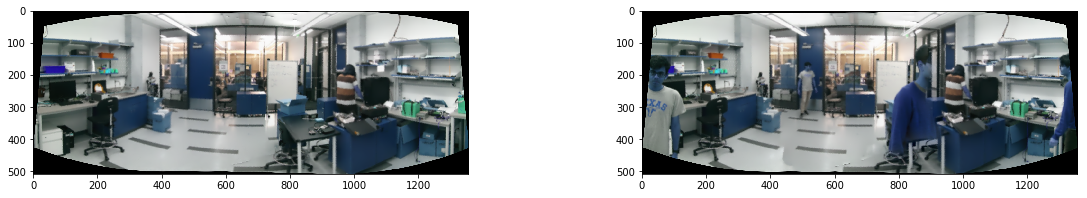

Diff image


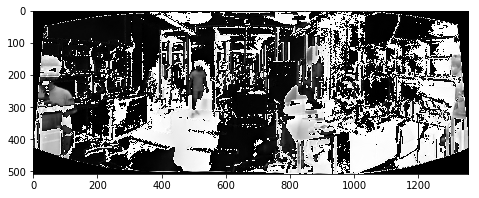

lbfuzzyadaptivesom MSE:  4051.7961957767793
lbfuzzyadaptivesom SSIM:  0.658849349824223


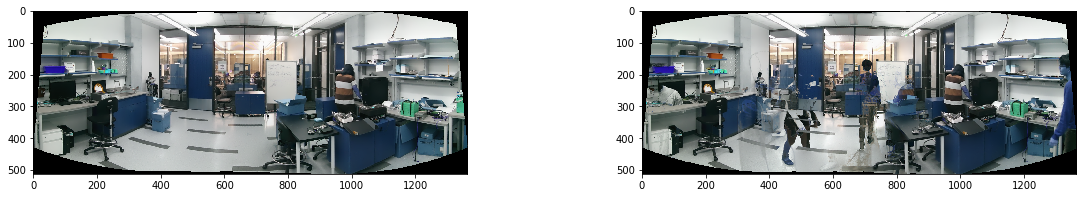

Diff image


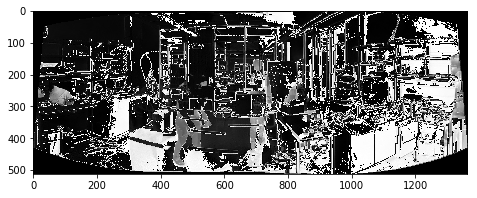

knn MSE:  5376.040287804955
knn SSIM:  0.6659545543304106


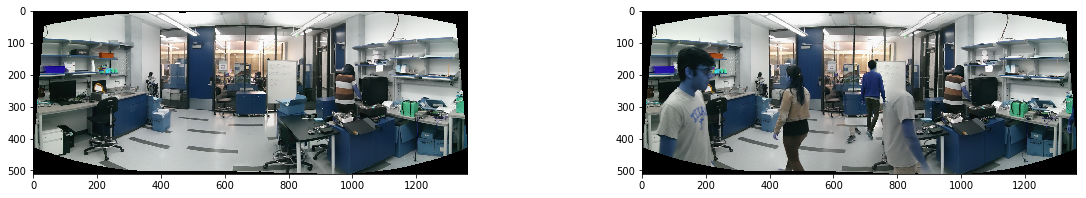

Diff image


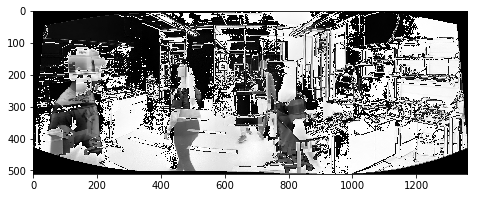

lb_fuzzy MSE:  5069.657259829282
lb_fuzzy SSIM:  0.5776085634967032


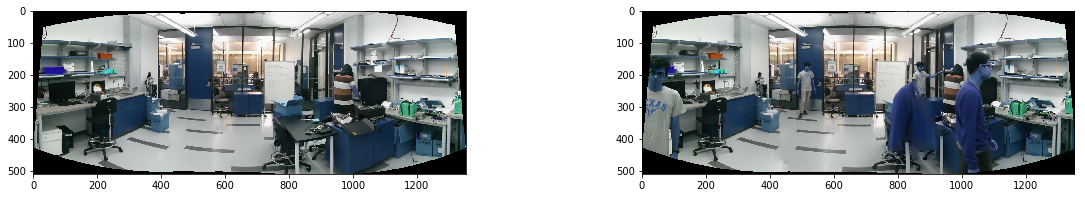

Diff image


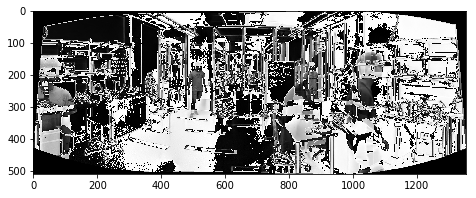

mog2 MSE:  3850.049329584775
mog2 SSIM:  0.6066813770223234


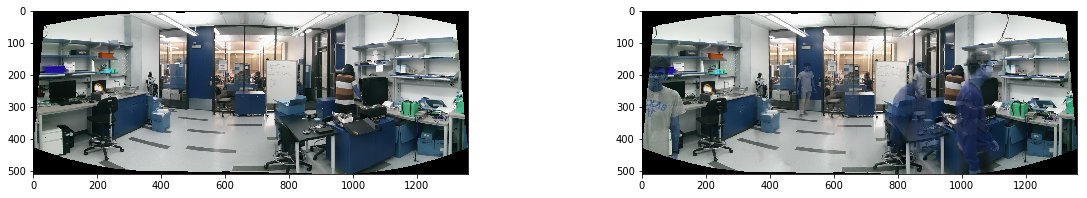

Diff image


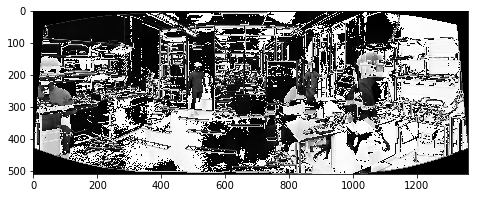

In [38]:
plt.rcParams["figure.figsize"] = (20,3)

algorithms = ["lobster", "lbfuzzyadaptivesom", "knn", "lb_fuzzy", "mog2"]

def crop_images(im1, im2):
    smallest_height = min(im1.shape[0], im2.shape[0])
    smallest_width = min(im1.shape[1], im2.shape[1])
    
    return im1[0:smallest_height, 0:smallest_width], im2[0:smallest_height, 0:smallest_width]
    
for algo in algorithms:
    gt_image_path = f'walking/{algo}_walking_center.png'
    stitched_image_path = f'walking/{algo}_walking_discrete.png'
    
    gt_image = cv2.imread(gt_image_path)
    stitched_image = cv2.imread(stitched_image_path)
    
    gt_image, stitched_image = crop_images(gt_image, stitched_image)
    
    print(algo, "MSE: ", mse(gt_image, stitched_image))
    
    print(algo, "SSIM: ", ssim(gt_image, stitched_image))
    
    plt.subplot(1, 2, 1)
    plt.imshow(gt_image)
    plt.subplot(1, 2, 2)
    plt.imshow(stitched_image)
    plt.show()

    print("Diff image")
    plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2GRAY) - cv2.cvtColor(gt_image, cv2.COLOR_BGR2GRAY), cmap='gray', vmin=0, vmax=255)
    plt.show()